## DIVIDEND PAYOUT RATIO ANALYSIS

In [7]:
# I will analyse the Dividend Payout Ratio (DPR), which is:

# 𝐷𝑃𝑅=𝐷𝐼𝑉𝐼𝐷𝐸𝑁𝐷/ 𝑁𝐸𝑇_𝐼𝑁𝐶𝑂𝑀𝐸


In [8]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore' )
from sklearn.linear_model import LinearRegression

sns.set()
%matplotlib inline

In [9]:
import os
os.getcwd()

'/Users/jay/Downloads'

In [10]:
os.chdir('/Users/jay/Downloads')

In [ ]:
# extracting the excel file as a pandas dataframe into the jupyter notebook using the pd.read function

df = pd.read_excel('international_dividend_2022.xlsx')


## exploring the data set

In [ ]:
df.head()

In [ ]:
df.shape

## data pre-processing

In [1]:
# excluding rows where EBIT is negative

df1 = df[df.EBIT > 0.0]

NameError: name 'df' is not defined

In [710]:
# excluding rows where net income is negative

df2 = df1[df1.NET_INCOME > 0.0]
df2

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
7,C036ABF00,2009,872.248,271.829,333.655,426.206,70.309,148.737,743.940,19.271,126.380,210.919,47.658,782.990,0.000,69.634,36,Australia
8,C036ABF00,2010,1021.827,339.548,956.529,674.290,23.904,178.761,758.762,18.363,96.250,171.662,177.520,1043.746,0.000,48.328,36,Australia
9,C036ABF00,2011,793.947,387.590,566.612,467.719,71.076,149.779,517.333,19.191,81.657,163.890,166.249,811.803,0.000,42.320,36,Australia
10,C036ABF00,2012,987.385,386.281,811.228,586.685,125.225,131.500,737.993,23.278,54.368,142.462,97.072,1026.387,0.000,19.929,36,Australia
12,C036ABF00,2014,1113.976,512.138,641.568,836.628,18.354,140.809,685.890,13.005,122.227,266.400,69.873,910.108,0.000,124.114,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,30.475,31.817,826,UK
148011,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,31.244,29.130,826,UK
148012,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,31.655,29.522,826,UK
148013,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,32.493,35.754,826,UK


In [712]:
# dropping nan values in all rows

df3=df2.dropna(subset=['EBIT', 'MKT_EQUITY', 'BOOK_EQUITY','TA','SALES_USD','INTEREST', 'DIVIDEND', 'NET_INCOME'])
df3

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
7,C036ABF00,2009,872.248,271.829,333.655,426.206,70.309,148.737,743.940,19.271,126.380,210.919,47.658,782.990,0.000,69.634,36,Australia
8,C036ABF00,2010,1021.827,339.548,956.529,674.290,23.904,178.761,758.762,18.363,96.250,171.662,177.520,1043.746,0.000,48.328,36,Australia
9,C036ABF00,2011,793.947,387.590,566.612,467.719,71.076,149.779,517.333,19.191,81.657,163.890,166.249,811.803,0.000,42.320,36,Australia
10,C036ABF00,2012,987.385,386.281,811.228,586.685,125.225,131.500,737.993,23.278,54.368,142.462,97.072,1026.387,0.000,19.929,36,Australia
12,C036ABF00,2014,1113.976,512.138,641.568,836.628,18.354,140.809,685.890,13.005,122.227,266.400,69.873,910.108,0.000,124.114,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,30.475,31.817,826,UK
148011,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,31.244,29.130,826,UK
148012,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,31.655,29.522,826,UK
148013,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,32.493,35.754,826,UK


In [713]:
df3.shape

(104507, 18)

In [714]:
# dropping duplicate values

df4=df3.drop_duplicates()
df4.shape

(104507, 18)

In [715]:
# changing the column 'year' to 'Year'

df4=df4.rename(columns = {'year':'Year'})
df4

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
7,C036ABF00,2009,872.248,271.829,333.655,426.206,70.309,148.737,743.940,19.271,126.380,210.919,47.658,782.990,0.000,69.634,36,Australia
8,C036ABF00,2010,1021.827,339.548,956.529,674.290,23.904,178.761,758.762,18.363,96.250,171.662,177.520,1043.746,0.000,48.328,36,Australia
9,C036ABF00,2011,793.947,387.590,566.612,467.719,71.076,149.779,517.333,19.191,81.657,163.890,166.249,811.803,0.000,42.320,36,Australia
10,C036ABF00,2012,987.385,386.281,811.228,586.685,125.225,131.500,737.993,23.278,54.368,142.462,97.072,1026.387,0.000,19.929,36,Australia
12,C036ABF00,2014,1113.976,512.138,641.568,836.628,18.354,140.809,685.890,13.005,122.227,266.400,69.873,910.108,0.000,124.114,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,30.475,31.817,826,UK
148011,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,31.244,29.130,826,UK
148012,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,31.655,29.522,826,UK
148013,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,32.493,35.754,826,UK


In [716]:
# Setting the display format option to display three digits after the decimal point 

pd.set_option('display.float_format', '{:.2f}'.format)

## descriptive statistics

In [717]:
# descriptive statistics utilising the describe function

In [718]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,104507.00,2011.36,6.02,2001.00,2006.00,2012.00,2017.00,2021.00
TA,104507.00,370807.86,5067868.74,5.14,1231.38,12309.00,57337.14,359335527.00
SALES_USD,104507.00,1936.60,9597.51,10.00,83.64,251.40,885.58,476914.94
MKT_EQUITY,104507.00,87295.05,487645.34,0.00,845.54,5730.25,27863.16,26379738.67
BOOK_EQUITY,104507.00,64729.14,390372.22,-1351360.00,584.58,5407.00,26018.57,23404547.00
ST_DEBT,103255.00,38141.81,715915.06,0.00,7.92,475.40,4023.45,71618334.00
LT_DEBT,104182.00,41253.46,420015.94,-20398.00,5.10,373.52,3995.97,31679355.00
NPPE,102729.00,50813.59,331830.02,0.00,132.01,2548.42,14545.00,12567459.00
INTEREST,104507.00,955.53,10541.20,0.00,2.00,22.00,145.79,958000.00
EBIT,104507.00,9458.26,63311.41,0.00,83.70,656.00,3101.19,5977706.00


## creating key variables

In [719]:
df4['Tangibility']=df4['NPPE']/df4['TA']
df4['Market_to_book']= (df4['TA'] + df4['MKT_EQUITY'] - df4['BOOK_EQUITY']) /df4['TA']
df4['Log_TA'] = np.log(df4['TA_USD'])
df4['Profitability']=df4['EBITDA']/df4['TA']
df4['DPR']=df4['DIVIDEND']/df4['NET_INCOME']

In [720]:
df4

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,Tangibility,Market_to_book,Log_TA,Profitability,DPR
7,C036ABF00,2009,872.25,271.83,333.65,426.21,70.31,148.74,743.94,19.27,...,782.99,0.00,69.63,36,Australia,0.85,0.89,6.66,0.24,0.00
8,C036ABF00,2010,1021.83,339.55,956.53,674.29,23.90,178.76,758.76,18.36,...,1043.75,0.00,48.33,36,Australia,0.74,1.28,6.95,0.17,0.00
9,C036ABF00,2011,793.95,387.59,566.61,467.72,71.08,149.78,517.33,19.19,...,811.80,0.00,42.32,36,Australia,0.65,1.12,6.70,0.21,0.00
10,C036ABF00,2012,987.38,386.28,811.23,586.68,125.22,131.50,737.99,23.28,...,1026.39,0.00,19.93,36,Australia,0.75,1.23,6.93,0.14,0.00
12,C036ABF00,2014,1113.98,512.14,641.57,836.63,18.35,140.81,685.89,13.01,...,910.11,0.00,124.11,36,Australia,0.62,0.82,6.81,0.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.16,461.95,852.48,148.53,0.00,0.00,19.10,0.00,...,422.45,30.48,31.82,826,UK,0.07,3.76,6.05,0.32,0.96
148011,C82699850,2014,254.38,428.37,912.27,151.50,0.00,0.00,20.40,0.00,...,396.24,31.24,29.13,826,UK,0.08,3.99,5.98,0.30,1.07
148012,C82699850,2015,267.09,435.81,766.49,153.45,0.00,0.00,23.20,0.00,...,393.94,31.66,29.52,826,UK,0.09,3.30,5.98,0.29,1.07
148013,C82699850,2016,294.32,409.29,883.21,165.08,0.00,0.00,20.57,0.00,...,362.91,32.49,35.75,826,UK,0.07,3.44,5.89,0.30,0.91


In [721]:
pd.set_option('display.float_format', '{:.3f}'.format)
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,104507.000,2011.359,6.016,2001.000,2006.000,2012.000,2017.000,2021.000
TA,104507.000,370807.858,5067868.735,5.136,1231.379,12309.000,57337.139,359335527.000
SALES_USD,104507.000,1936.598,9597.509,10.002,83.639,251.395,885.580,476914.936
MKT_EQUITY,104507.000,87295.049,487645.341,0.000,845.542,5730.250,27863.160,26379738.669
BOOK_EQUITY,104507.000,64729.137,390372.216,-1351360.000,584.579,5407.000,26018.567,23404547.000
ST_DEBT,103255.000,38141.806,715915.065,0.000,7.923,475.400,4023.450,71618334.000
LT_DEBT,104182.000,41253.464,420015.943,-20398.000,5.100,373.518,3995.970,31679355.000
NPPE,102729.000,50813.586,331830.025,0.000,132.012,2548.419,14545.000,12567459.000
INTEREST,104507.000,955.526,10541.204,0.000,2.000,22.000,145.789,958000.000
EBIT,104507.000,9458.261,63311.412,0.002,83.703,656.000,3101.188,5977706.000


## capping dividend payout ratio at 1

In [722]:
df4.loc[df4.DPR > 1.0, 'DPR'] = 1.0

## cleaning the newly created variables

In [723]:
df4=df4.dropna(subset=['Tangibility', 'Market_to_book', 'Log_TA','Profitability','DPR'])

In [724]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,102055.000,2011.326,6.018,2001.000,2006.000,2011.000,2017.000,2021.000
TA,102055.000,378091.342,5126516.504,5.136,1481.462,13176.000,59327.910,359335527.000
SALES_USD,102055.000,1968.415,9676.453,10.006,88.303,261.573,911.479,476914.936
MKT_EQUITY,102055.000,89202.400,493104.878,0.000,975.199,6074.759,29006.760,26379738.669
BOOK_EQUITY,102055.000,66170.057,394863.245,-1351360.000,674.383,5782.903,27090.000,23404547.000
ST_DEBT,101052.000,38888.798,723589.005,0.000,9.305,520.526,4199.000,71618334.000
LT_DEBT,101739.000,42164.602,424929.254,-20398.000,6.000,412.000,4206.150,31679355.000
NPPE,102055.000,51092.613,332878.645,0.000,133.000,2594.000,14680.000,12567459.000
INTEREST,102055.000,976.425,10664.173,0.000,2.200,23.975,152.000,958000.000
EBIT,102055.000,9670.507,64047.239,0.002,95.975,699.067,3228.253,5977706.000


## creating a subset specifically for the analysis

In [725]:
df5 = df4[["Tangibility", "Market_to_book", "Year", "Log_TA", "Profitability", "DPR", "COUNTRY"]]
df5

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR,COUNTRY
7,0.853,0.894,2009,6.663,0.242,0.000,Australia
8,0.743,1.276,2010,6.951,0.168,0.000,Australia
9,0.652,1.125,2011,6.699,0.206,0.000,Australia
10,0.747,1.227,2012,6.934,0.144,0.000,Australia
12,0.616,0.825,2014,6.814,0.239,0.000,Australia
...,...,...,...,...,...,...,...
148010,0.075,3.759,2013,6.046,0.319,0.958,UK
148011,0.080,3.991,2014,5.982,0.303,1.000,UK
148012,0.087,3.295,2015,5.976,0.295,1.000,UK
148013,0.070,3.440,2016,5.894,0.304,0.909,UK


In [726]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,102055.000,0.270,0.225,0.000,0.076,0.231,0.399,0.999
Market_to_book,102055.000,1.442,2.117,-0.034,0.865,1.049,1.460,331.551
Year,102055.000,2011.326,6.018,2001.000,2006.000,2011.000,2017.000,2021.000
Log_TA,102055.000,6.044,1.930,2.304,4.676,5.784,7.131,15.141
Profitability,102055.000,0.112,0.196,-0.041,0.060,0.094,0.140,47.038
DPR,102055.000,0.342,0.304,0.000,0.115,0.263,0.494,1.000


## Data visualisation & Descriptive statistics for Japan and Hong Kong

## To ascertain the percentage of dividend paying firms

In [727]:
# create a new data frame for only Japan 
japp = df5[df5['COUNTRY'] == 'Japan']

In [728]:
# create a new data frame for only Hong Kong 
hong = df5[df5['COUNTRY'] == 'Hong Kong']

In [729]:
# convert the new dataframe to a one dimensional dataframe

japp1 = japp['DPR']

In [730]:
hong1 = hong['DPR']

In [731]:
japp2 = pd.DataFrame(japp1)

In [732]:
hong2 = pd.DataFrame(hong1)

In [733]:
japp2

,DPR
40444,0.036
40448,0.000
40449,0.000
40450,0.000
40453,0.000
...,...
121044,0.191
121045,0.205
121046,0.495
121048,1.000


In [734]:
hong2

,DPR
15000,0.107
15001,0.341
15002,0.351
15003,0.000
15004,1.000
...,...
40439,0.178
40440,0.295
40441,0.379
40442,1.000


In [735]:
# a dividend payout ratio above 0 indicates the firm pays dividends
# a dividend payout ratio less than or equal to zero indicates a firm does not pay dividends
# we can then assign a value of 1 to all DPRs above 0 and a value of 0 if otherwise

In [736]:
japp2.loc[japp2.DPR > 0.0, 'DPR'] = 1.0

In [737]:
hong2.loc[hong2.DPR > 0.0, 'DPR'] = 1.0

In [738]:
japp2.loc[japp2.DPR == 0.0, 'DPR'] = 0.0

In [739]:
hong2.loc[hong2.DPR == 0.0, 'DPR'] = 0.0

In [740]:
japp2.loc[japp2.DPR < 0.0, 'DPR'] = 0.0

In [741]:
hong2.loc[hong2.DPR < 0.0, 'DPR'] = 0.0

In [742]:
japp2

,DPR
40444,1.000
40448,0.000
40449,0.000
40450,0.000
40453,0.000
...,...
121044,1.000
121045,1.000
121046,1.000
121048,1.000


In [743]:
hong2

,DPR
15000,1.000
15001,1.000
15002,1.000
15003,0.000
15004,1.000
...,...
40439,1.000
40440,1.000
40441,1.000
40442,1.000


In [744]:
# we then pass a code to count the amount of firms paying dividends or otherwise

In [745]:
japp2[(japp2['DPR']>0)].count()

DPR    55669
dtype: int64

In [746]:
hong2[(hong2['DPR']>0)].count()

DPR    10267
dtype: int64

In [747]:
japp2[(japp2['DPR'] == 0)].count()

DPR    6221
dtype: int64

In [748]:
hong2[(hong2['DPR'] == 0)].count()

DPR    4642
dtype: int64

In [749]:
# we then create a dataframe with this information to visualise in a pie chart

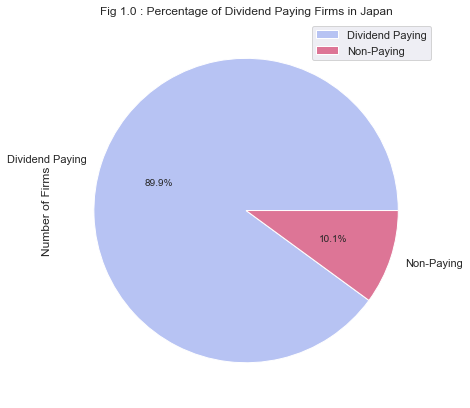

In [911]:
japp3 = pd.DataFrame({'Number of Firms': [55669, 6221]},
                  index=['Dividend Paying', 'Non-Paying'])
plot = japp3.plot.pie(y='Number of Firms', figsize=(7, 7), autopct='%1.1f%%',colors = colors)
plt.title('Fig 1.0 : Percentage of Dividend Paying Firms in Japan')
plt.savefig('percdivjap', dpi=400, bbox_inches='tight')


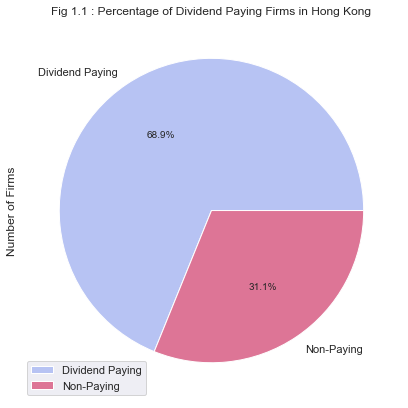

In [912]:
hong3 = pd.DataFrame({'Number of Firms': [10267, 4642]},
                  index=['Dividend Paying', 'Non-Paying'])
plot = hong3.plot.pie(y='Number of Firms', figsize=(7, 7), autopct='%1.1f%%',colors = colors)
plt.title('Fig 1.1 : Percentage of Dividend Paying Firms in Hong Kong')
plt.savefig('percdivhk', dpi=400, bbox_inches='tight')

## More Visualisations

In [752]:
# creating separate dataframes for Japan and Hong Kong

In [753]:
df_jap = df5[df5['COUNTRY'] == 'Japan']
df_jap = df_jap.dropna()
df_jap.shape

(61890, 7)

In [754]:
df_hk = df5[df5['COUNTRY'] == 'Hong Kong']
df_hk = df_hk.dropna()
df_hk.shape

(14909, 7)

In [916]:

df_both = df5[(df5.COUNTRY == 'Japan') | (df5.COUNTRY == 'Hong Kong')]
df_both

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR,COUNTRY
15000,0.046,1.519,2001,5.206,0.164,0.107,Hong Kong
15001,0.044,0.976,2002,5.438,0.106,0.341,Hong Kong
15002,0.044,0.834,2003,5.507,0.070,0.351,Hong Kong
15003,0.044,0.820,2004,5.638,0.068,0.000,Hong Kong
15004,0.020,0.837,2005,5.766,0.034,1.000,Hong Kong
...,...,...,...,...,...,...,...
121044,0.053,1.067,2004,9.809,0.086,0.191,Japan
121045,0.052,1.029,2005,9.785,0.074,0.205,Japan
121046,0.028,1.039,2006,9.611,0.053,0.495,Japan
121048,0.034,0.897,2008,9.544,0.024,1.000,Japan


In [755]:
# descriptive statistics for Japan

df_jap.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_jap[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "DPR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,61890.000,0.280,0.203,0.000,0.120,0.256,0.398,0.982
Market_to_book,61890.000,1.306,2.002,0.198,0.839,0.993,1.266,331.551
Log_TA,61890.000,6.069,1.833,2.305,4.792,5.808,7.047,14.993
Profitability,61890.000,0.097,0.215,-0.041,0.056,0.085,0.122,47.038
DPR,61890.000,0.321,0.276,0.000,0.135,0.247,0.419,1.000


In [756]:
# descriptive statistics for Hong Kong

pd.set_option('display.float_format', '{:.3f}'.format)
df_hk[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "DPR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,14909.000,0.238,0.228,0.000,0.046,0.171,0.373,0.994
Market_to_book,14909.000,1.432,2.610,0.078,0.781,1.012,1.471,184.125
Log_TA,14909.000,6.210,2.006,2.304,4.734,5.927,7.457,14.907
Profitability,14909.000,0.115,0.196,-0.002,0.056,0.092,0.143,13.951
DPR,14909.000,0.298,0.322,0.000,0.000,0.205,0.468,1.000


In [917]:
df_both.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_both[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "DPR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,76799.000,0.272,0.208,0.000,0.099,0.244,0.395,0.994
Market_to_book,76799.000,1.330,2.134,0.078,0.830,0.996,1.300,331.551
Log_TA,76799.000,6.097,1.869,2.304,4.780,5.831,7.117,14.993
Profitability,76799.000,0.101,0.212,-0.041,0.056,0.086,0.126,47.038
DPR,76799.000,0.317,0.286,0.000,0.116,0.242,0.428,1.000


In [757]:
# I removed outliers by capping the variables at top and bottom 1% for Japan

df_jap1 = df_jap.loc[:, df_jap.columns != 'COUNTRY']
df_jap1=df_jap1.dropna()
df_jap1 = df_jap1.clip(lower=df_jap1.quantile(0.01), upper=df_jap1.quantile(0.99), axis=1)

df_jap1.head()

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
40444,0.076,5.740,2006,2.824,0.297,0.036
40448,0.069,6.737,2004,4.598,0.137,0.000
40449,0.054,6.737,2005,4.872,0.199,0.000
40450,0.019,4.898,2006,6.472,0.066,0.000
40453,0.032,3.067,2009,6.134,0.096,0.000


In [758]:
df_jap1

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
40444,0.076,5.740,2006,2.824,0.297,0.036
40448,0.069,6.737,2004,4.598,0.137,0.000
40449,0.054,6.737,2005,4.872,0.199,0.000
40450,0.019,4.898,2006,6.472,0.066,0.000
40453,0.032,3.067,2009,6.134,0.096,0.000
...,...,...,...,...,...,...
121044,0.053,1.067,2004,9.809,0.086,0.191
121045,0.052,1.029,2005,9.785,0.074,0.205
121046,0.028,1.039,2006,9.611,0.053,0.495
121048,0.034,0.897,2008,9.544,0.024,1.000


In [759]:
# I removed outliers by capping the variables at top and bottom 1% for Hong Kong

df_hk1 = df_hk.loc[:, df_hk.columns != 'COUNTRY']
df_hk1=df_hk1.dropna()
df_hk1 = df_hk1.clip(lower=df_hk1.quantile(0.01), upper=df_hk1.quantile(0.99), axis=1)

df_hk1.head()

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
15000,0.046,1.519,2001,5.206,0.164,0.107
15001,0.044,0.976,2002,5.438,0.106,0.341
15002,0.044,0.834,2003,5.507,0.070,0.351
15003,0.044,0.820,2004,5.638,0.068,0.000
15004,0.020,0.837,2005,5.766,0.034,1.000


In [760]:
df_hk1

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
15000,0.046,1.519,2001,5.206,0.164,0.107
15001,0.044,0.976,2002,5.438,0.106,0.341
15002,0.044,0.834,2003,5.507,0.070,0.351
15003,0.044,0.820,2004,5.638,0.068,0.000
15004,0.020,0.837,2005,5.766,0.034,1.000
...,...,...,...,...,...,...
40439,0.529,1.270,2017,5.828,0.091,0.178
40440,0.559,1.160,2018,5.843,0.064,0.295
40441,0.581,1.060,2019,5.913,0.102,0.379
40442,0.508,0.932,2020,6.034,0.023,1.000


In [919]:
df_both1 = df_both.loc[:, df_both.columns != 'COUNTRY']
df_both1=df_both1.dropna()
df_both1 = df_both1.clip(lower=df_both1.quantile(0.01), upper=df_both1.quantile(0.99), axis=1)

df_both1.head()

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
15000,0.046,1.519,2001,5.206,0.164,0.107
15001,0.044,0.976,2002,5.438,0.106,0.341
15002,0.044,0.834,2003,5.507,0.070,0.351
15003,0.044,0.820,2004,5.638,0.068,0.000
15004,0.020,0.837,2005,5.766,0.034,1.000


In [761]:
# clipped distribution in Japan

df_jap1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
0.000,0.003,0.486,2001.000,2.824,0.004,0.000
0.010,0.003,0.486,2001.000,2.824,0.004,0.000
0.250,0.120,0.839,2006.000,4.792,0.056,0.135
0.500,0.256,0.993,2012.000,5.808,0.085,0.247
0.750,0.398,1.266,2017.000,7.047,0.122,0.419
0.990,0.879,6.737,2021.000,11.251,0.301,1.000
1.000,0.879,6.737,2021.000,11.251,0.301,1.000


In [762]:
# clipped distribution in Hong Kong

df_hk1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
0.000,0.001,0.361,2001.000,2.721,0.009,0.000
0.010,0.001,0.361,2001.000,2.721,0.009,0.000
0.250,0.046,0.781,2008.000,4.734,0.056,0.000
0.500,0.171,1.012,2014.000,5.927,0.092,0.205
0.750,0.373,1.471,2018.000,7.457,0.143,0.468
0.990,0.911,7.046,2021.000,11.562,0.389,1.000
1.000,0.911,7.049,2021.000,11.562,0.389,1.000


In [920]:
df_both1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Log_TA,Profitability,DPR
0.000,0.002,0.453,2001.000,2.803,0.004,0.000
0.010,0.002,0.453,2001.000,2.803,0.004,0.000
0.250,0.099,0.830,2006.000,4.780,0.056,0.116
0.500,0.244,0.996,2012.000,5.831,0.086,0.242
0.750,0.395,1.300,2017.000,7.117,0.126,0.428
0.990,0.884,6.854,2021.000,11.329,0.322,1.000
1.000,0.884,6.854,2021.000,11.329,0.322,1.000


In [763]:
df_jap1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,61890.000,0.279,0.201,0.003,0.120,0.256,0.398,0.879
Market_to_book,61890.000,1.248,0.906,0.486,0.839,0.993,1.266,6.737
Year,61890.000,2011.320,6.005,2001.000,2006.000,2012.000,2017.000,2021.000
Log_TA,61890.000,6.063,1.800,2.824,4.792,5.808,7.047,11.251
Profitability,61890.000,0.095,0.057,0.004,0.056,0.085,0.122,0.301
DPR,61890.000,0.321,0.276,0.000,0.135,0.247,0.419,1.000


In [764]:
df_hk1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,14909.000,0.238,0.226,0.001,0.046,0.171,0.373,0.911
Market_to_book,14909.000,1.342,1.048,0.361,0.781,1.012,1.471,7.049
Year,14909.000,2012.698,5.990,2001.000,2008.000,2014.000,2018.000,2021.000
Log_TA,14909.000,6.202,1.973,2.721,4.734,5.927,7.457,11.562
Profitability,14909.000,0.109,0.074,0.009,0.056,0.092,0.143,0.389
DPR,14909.000,0.298,0.322,0.000,0.000,0.205,0.468,1.000


In [921]:
df_both1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,76799.000,0.271,0.207,0.002,0.099,0.244,0.395,0.884
Market_to_book,76799.000,1.267,0.939,0.453,0.830,0.996,1.300,6.854
Year,76799.000,2011.587,6.027,2001.000,2006.000,2012.000,2017.000,2021.000
Log_TA,76799.000,6.090,1.836,2.803,4.780,5.831,7.117,11.329
Profitability,76799.000,0.098,0.061,0.004,0.056,0.086,0.126,0.322
DPR,76799.000,0.317,0.286,0.000,0.116,0.242,0.428,1.000


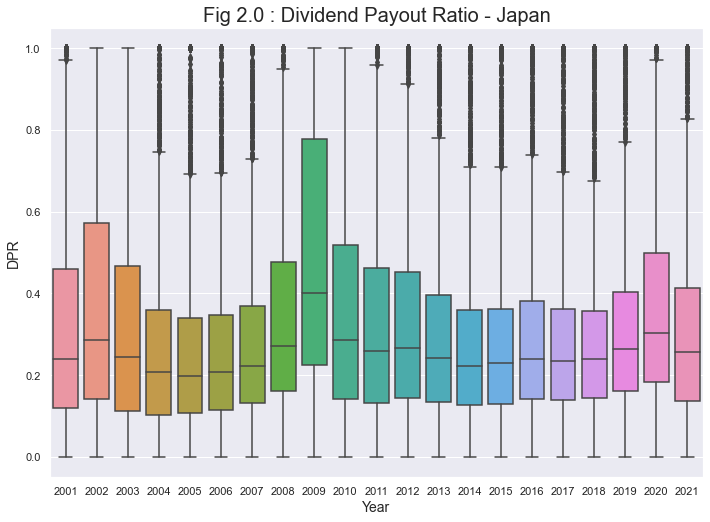

In [913]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot("Year","DPR",data= df_jap1,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('Fig 2.0 : Dividend Payout Ratio - Japan', fontsize=20)
    plt.savefig('divpayratjap', dpi=400, bbox_inches='tight')

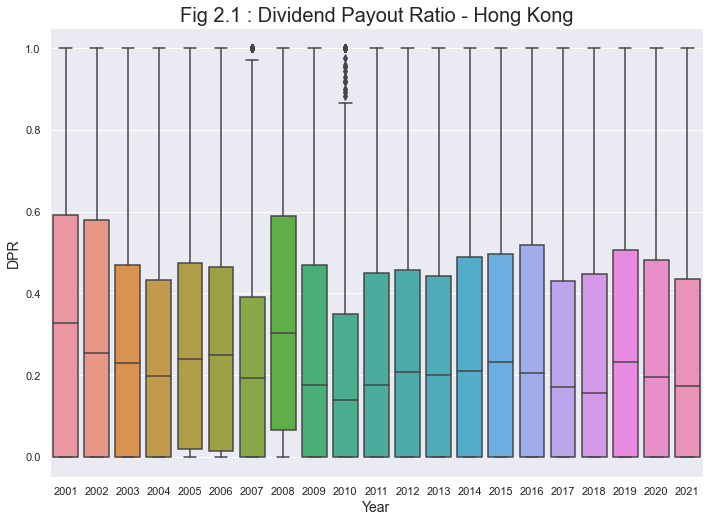

In [922]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot("Year","DPR",data= df_hk1,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('Fig 2.1 : Dividend Payout Ratio - Hong Kong', fontsize=20)
    plt.savefig('divpayrathong', dpi=400, bbox_inches='tight')

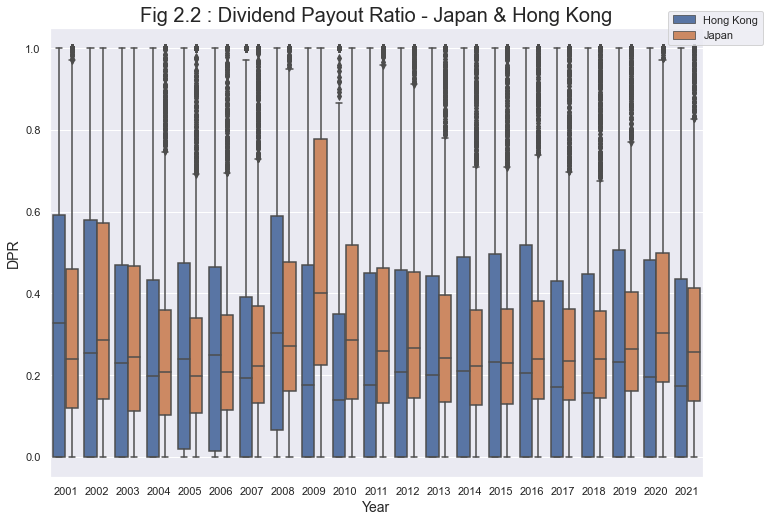

In [928]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot('Year','DPR','COUNTRY', data= df_both,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('Fig 2.2 : Dividend Payout Ratio - Japan & Hong Kong', fontsize=20)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.savefig('divpayratboth', dpi=400, bbox_inches='tight')

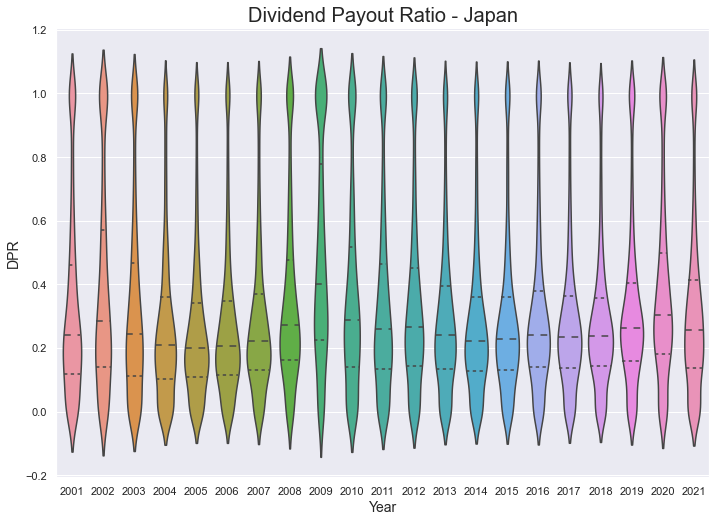

In [769]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","DPR",data=df_jap1,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('Dividend Payout Ratio - Japan', fontsize=20)

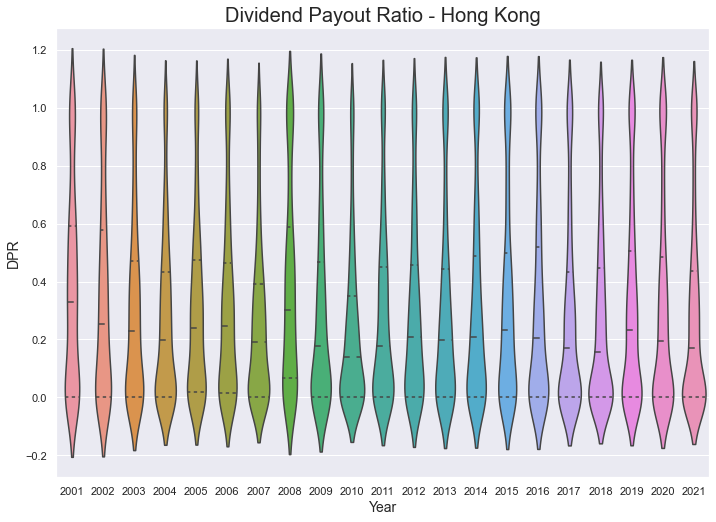

In [770]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","DPR",data=df_hk1,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('Dividend Payout Ratio - Hong Kong', fontsize=20)

## Dividend Payout Ratio over Time

In [771]:
g_jap_df1 = df_jap1[['Year', 'DPR']]

g_jap_df1 = g_jap_df1.groupby('Year')

quantiles = g_jap_df1['DPR'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_jap_df1['DPR'].agg(['mean'])

data_combined_jap = pd.concat([quantiles, mean], 1)
data_stacked_jap =data_combined_jap.stack().reset_index(name='DPR').rename(columns={'level_1': 'Quantiles and Mean'})


data_stacked_jap

,Year,Quantiles and Mean,DPR
0,2001,0.100,0.000
1,2001,0.250,0.119
2,2001,0.500,0.240
3,2001,0.750,0.459
4,2001,0.900,0.944
...,...,...,...
121,2021,0.250,0.136
122,2021,0.500,0.258
123,2021,0.750,0.413
124,2021,0.900,0.722


In [772]:
g_hk_df1 = df_hk1[['Year', 'DPR']]

g_hk_df1 = g_hk_df1.groupby('Year')

quantiles = g_hk_df1['DPR'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_hk_df1['DPR'].agg(['mean'])

data_combined_hk = pd.concat([quantiles, mean], 1)
data_stacked_hk =data_combined_hk.stack().reset_index(name='DPR').rename(columns={'level_1': 'Quantiles and Mean'})


data_stacked_hk

,Year,Quantiles and Mean,DPR
0,2001,0.100,0.000
1,2001,0.250,0.000
2,2001,0.500,0.328
3,2001,0.750,0.592
4,2001,0.900,0.985
...,...,...,...
121,2021,0.250,0.000
122,2021,0.500,0.172
123,2021,0.750,0.435
124,2021,0.900,0.912


## Catplot Illustration of Dividend Payout Ratio over Time

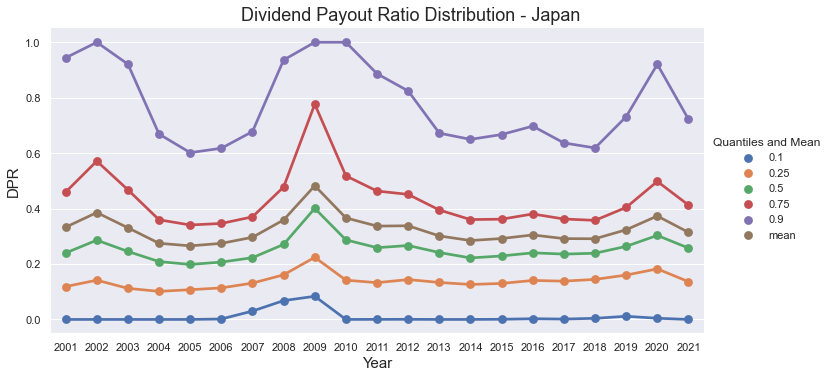

In [773]:
ax = sns.catplot(x="Year", y="DPR", hue="Quantiles and Mean", kind="point", data=data_stacked_jap, 
        height=5, 
        aspect=2); 

ax.fig.suptitle('Dividend Payout Ratio Distribution - Japan',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

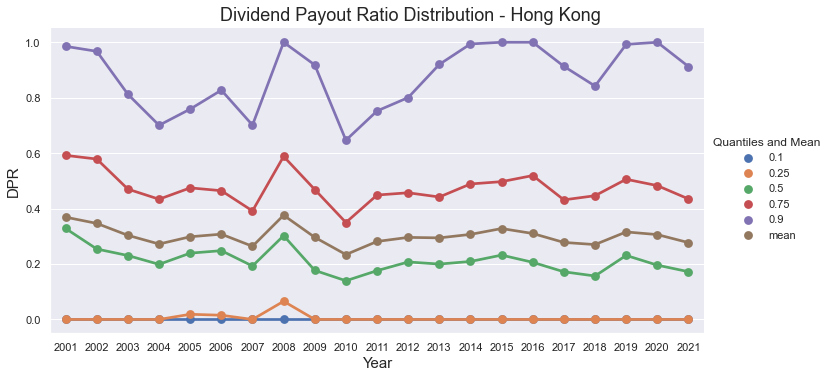

In [774]:
ax = sns.catplot(x="Year", y="DPR", hue="Quantiles and Mean", kind="point", data=data_stacked_hk, 
        height=5, # make the plot 5 units high
        aspect=2); # height should be three times width

ax.fig.suptitle('Dividend Payout Ratio Distribution - Hong Kong',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

## Exploring relationship between Firm Characteristics and Dividend Payout Ratio in Japan & Hong Kong using boxplots in 2021, 2020

## Japan

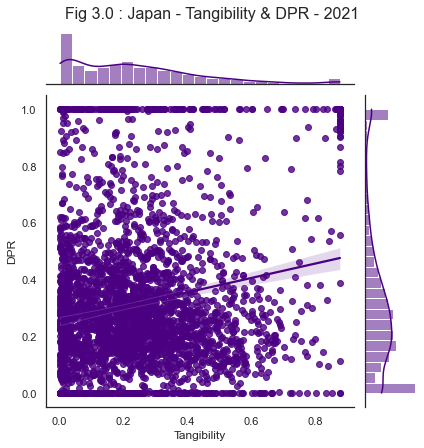

In [938]:
df_jap_2021 = df_jap1[df_jap1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_jap_2021, kind='reg',color='indigo')
    p.fig.suptitle("Fig 3.0 : Japan - Tangibility & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('tangjap21', dpi=400, bbox_inches='tight')
    plt.show()

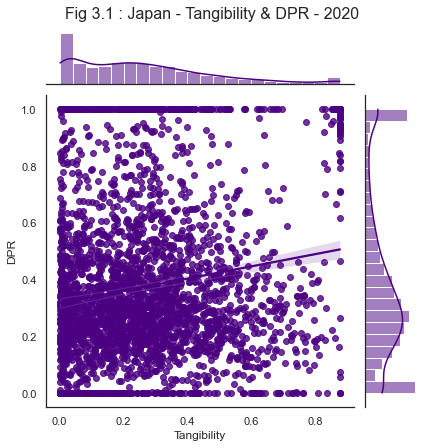

In [930]:
df_jap_2020 = df_jap1[df_jap1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_jap_2020, kind='reg',color='indigo')
    p.fig.suptitle("Fig 3.1 : Japan - Tangibility & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('tangjap20', dpi=400, bbox_inches='tight')
    plt.show()

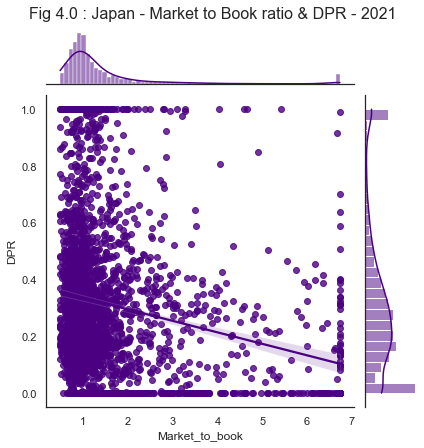

In [940]:
df_jap_2021 = df_jap1[df_jap1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","DPR", data=df_jap_2021, kind='reg',color='indigo')
    p.fig.suptitle("Fig 4.0 : Japan - Market to Book ratio & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Market_to_book', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('markjap21', dpi=400, bbox_inches='tight')
    plt.show()

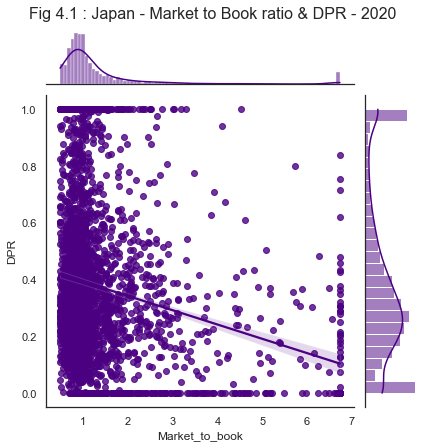

In [941]:
df_jap_2020 = df_jap1[df_jap1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","DPR", data=df_jap_2020, kind='reg',color='indigo')
    p.fig.suptitle("Fig 4.1 : Japan - Market to Book ratio & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Market_to_book', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('markjap20', dpi=400, bbox_inches='tight')
    plt.show()

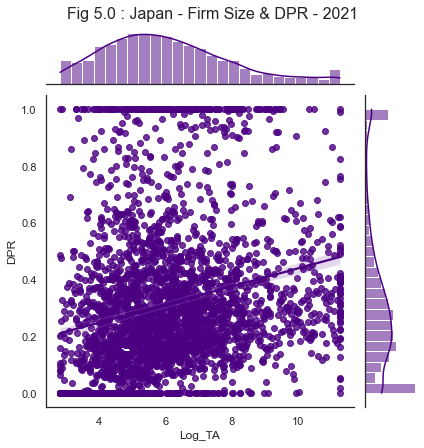

In [946]:
df_jap_2021 = df_jap1[df_jap1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","DPR", data=df_jap_2021, kind='reg',color='indigo')
    p.fig.suptitle("Fig 5.0 : Japan - Firm Size & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Log_TA', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('firmjap20', dpi=400, bbox_inches='tight')
    plt.show()

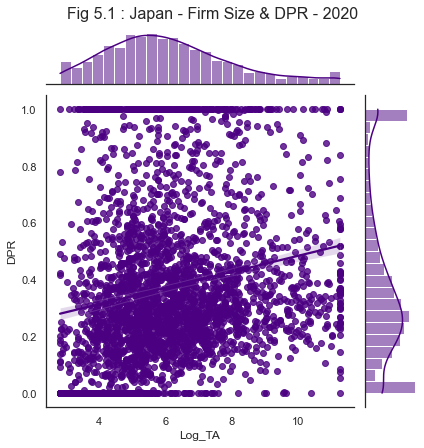

In [947]:
df_jap_2020 = df_jap1[df_jap1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","DPR", data=df_jap_2020, kind='reg',color='indigo')
    p.fig.suptitle("Fig 5.1 : Japan - Firm Size & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Log_TA', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('firmjap20', dpi=400, bbox_inches='tight')
    plt.show()

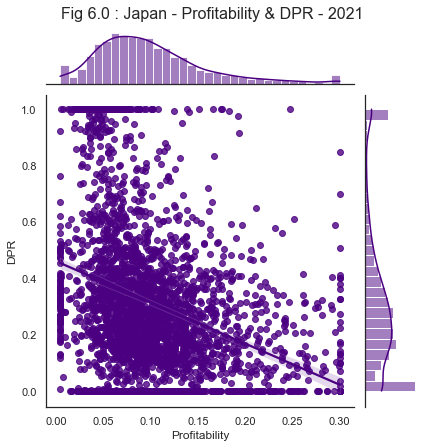

In [950]:
df_jap_2021 = df_jap1[df_jap1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_jap_2021, kind='reg',color='indigo')
    p.fig.suptitle("Fig 6.0 : Japan - Profitability & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('profjap20', dpi=400, bbox_inches='tight')
    plt.show()

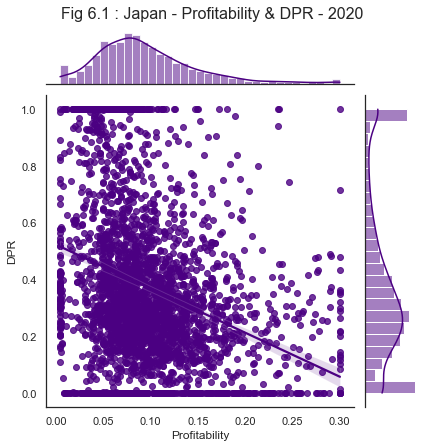

In [951]:
df_jap_2020 = df_jap1[df_jap1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_jap_2020, kind='reg',color='indigo')
    p.fig.suptitle("Fig 6.1 : Japan - Profitability & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('profjap2', dpi=400, bbox_inches='tight')
    plt.show()

## Hong Kong

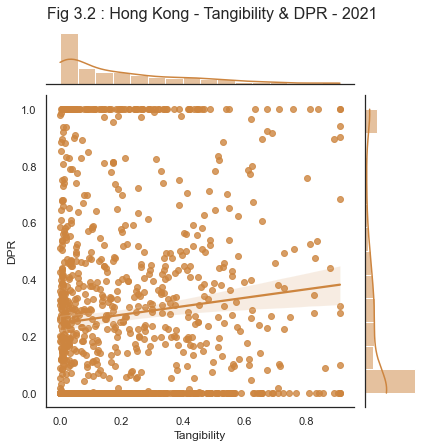

In [942]:
df_hk_2021 = df_hk1[df_hk1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_hk_2021, kind='reg',color='peru')
    p.fig.suptitle("Fig 3.2 : Hong Kong - Tangibility & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('tanghong21', dpi=400, bbox_inches='tight')
    plt.show()

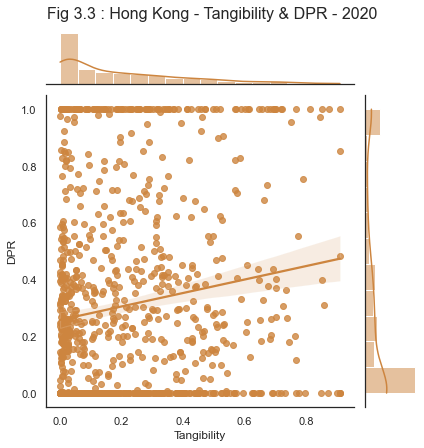

In [933]:
df_hk_2020 = df_hk1[df_hk1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_hk_2020, kind='reg',color='peru')
    p.fig.suptitle("Fig 3.3 : Hong Kong - Tangibility & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('tanghong20', dpi=400, bbox_inches='tight')
    plt.show()

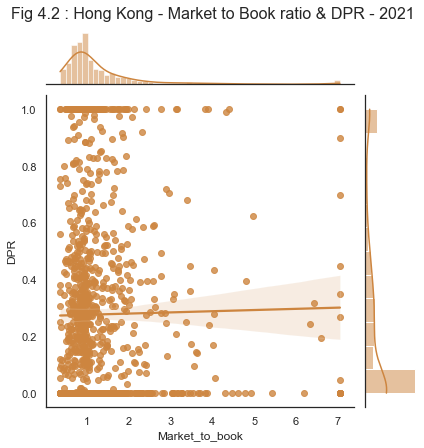

In [944]:
df_hk_2021 = df_hk1[df_hk1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","DPR", data=df_hk_2021, kind='reg',color='peru')
    p.fig.suptitle("Fig 4.2 : Hong Kong - Market to Book ratio & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Market_to_book', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('markhong21', dpi=400, bbox_inches='tight')
    plt.show()

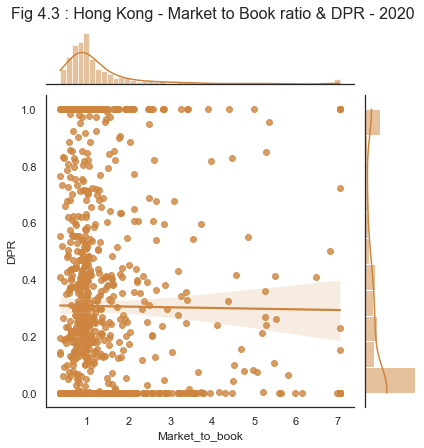

In [945]:
df_hk_2020 = df_hk1[df_hk1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","DPR", data=df_hk_2020, kind='reg',color='peru')
    p.fig.suptitle("Fig 4.3 : Hong Kong - Market to Book ratio & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Market_to_book', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('markhong20', dpi=400, bbox_inches='tight')
    plt.show()

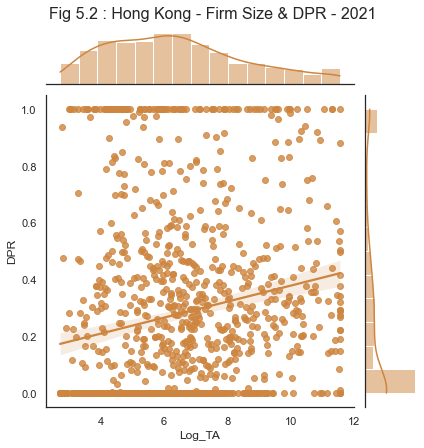

In [948]:
df_hk_2021 = df_hk1[df_hk1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","DPR", data=df_hk_2021, kind='reg',color='peru')
    p.fig.suptitle("Fig 5.2 : Hong Kong - Firm Size & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Log_TA', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('firmhong20', dpi=400, bbox_inches='tight')
    plt.show()

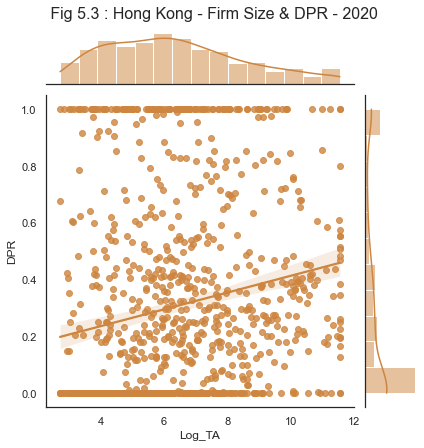

In [949]:
df_hk_2020 = df_hk1[df_hk1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","DPR", data=df_hk_2020, kind='reg',color='peru')
    p.fig.suptitle(" Fig 5.3 : Hong Kong - Firm Size & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Log_TA', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('firmhong2', dpi=400, bbox_inches='tight')
    plt.show()

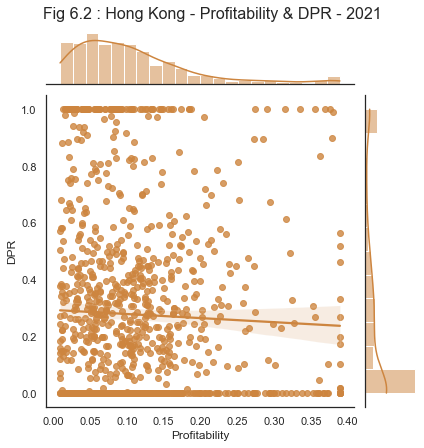

In [952]:
df_hk_2021 = df_hk1[df_hk1['Year'] == 2021]


with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_hk_2021, kind='reg',color='peru')
    p.fig.suptitle("Fig 6.2 : Hong Kong - Profitability & DPR - 2021",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('profhong21', dpi=400, bbox_inches='tight')
    plt.show()

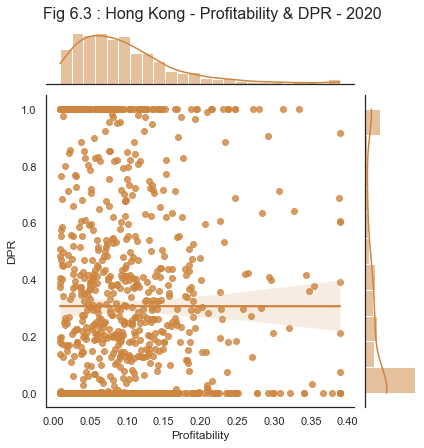

In [953]:
df_hk_2020 = df_hk1[df_hk1['Year'] == 2020]


with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_hk_2020, kind='reg',color='peru')
    p.fig.suptitle("Fig 6.3 : Hong Kong - Profitability & DPR - 2020",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.savefig('profhong20', dpi=400, bbox_inches='tight')
    plt.show()

## Regression and Scatter Plot using LinearRegression

## Japan

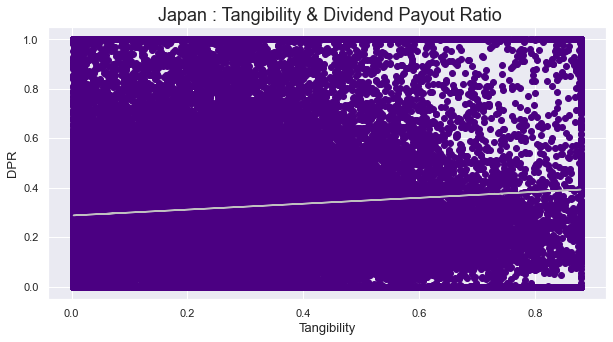

In [791]:
X = df_jap1["Tangibility"].values.reshape(-1, 1) 
Y = df_jap1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='indigo')
plt.plot(X, Y_pred, color='silver')

plt.title(' Japan : Tangibility & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

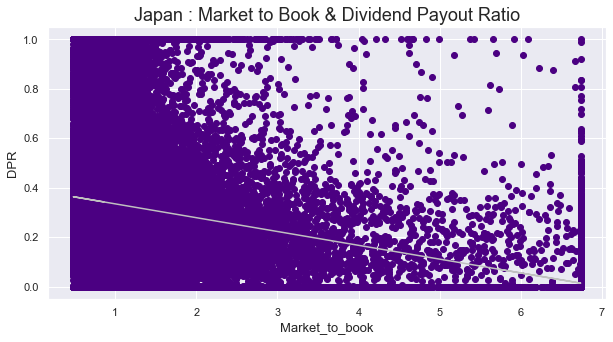

In [792]:
X = df_jap1["Market_to_book"].values.reshape(-1, 1) 
Y = df_jap1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='indigo')
plt.plot(X, Y_pred, color='silver')

plt.title('Japan : Market to Book & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Market_to_book', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

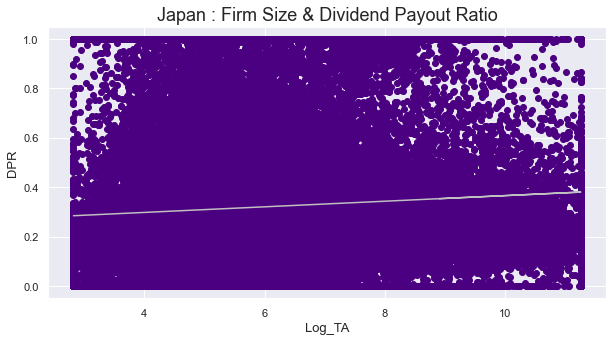

In [793]:
X = df_jap1["Log_TA"].values.reshape(-1, 1) 
Y = df_jap1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='indigo')
plt.plot(X, Y_pred, color='silver')

plt.title('Japan : Firm Size & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Log_TA', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

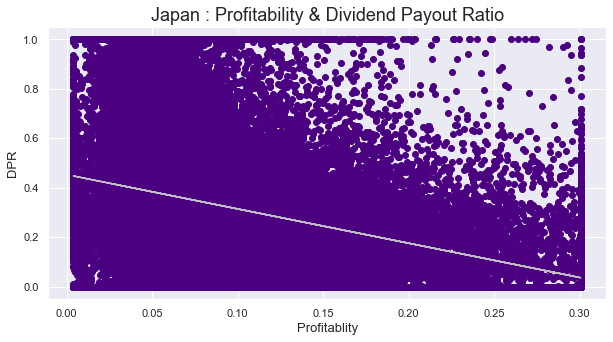

In [794]:
X = df_jap1["Profitability"].values.reshape(-1, 1) 
Y = df_jap1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='indigo')
plt.plot(X, Y_pred, color='silver')

plt.title('Japan : Profitability & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Profitablity', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

## Hong Kong

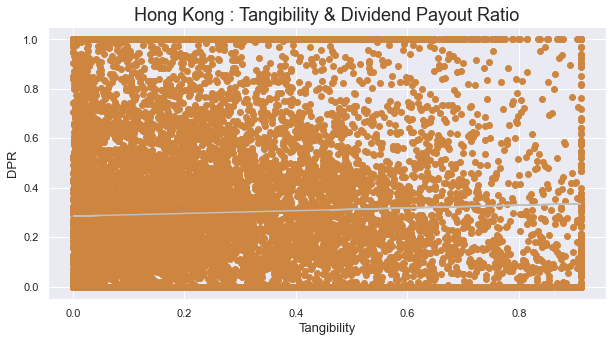

In [795]:
X = df_hk1["Tangibility"].values.reshape(-1, 1) 
Y = df_hk1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='peru')
plt.plot(X, Y_pred, color='silver')

plt.title('Hong Kong : Tangibility & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

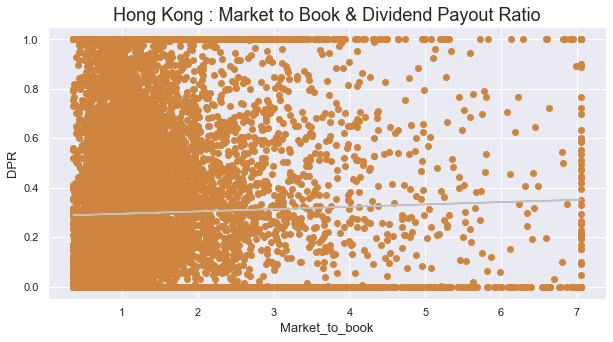

In [796]:
X = df_hk1["Market_to_book"].values.reshape(-1, 1) 
Y = df_hk1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='peru')
plt.plot(X, Y_pred, color='silver')

plt.title('Hong Kong : Market to Book & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Market_to_book', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

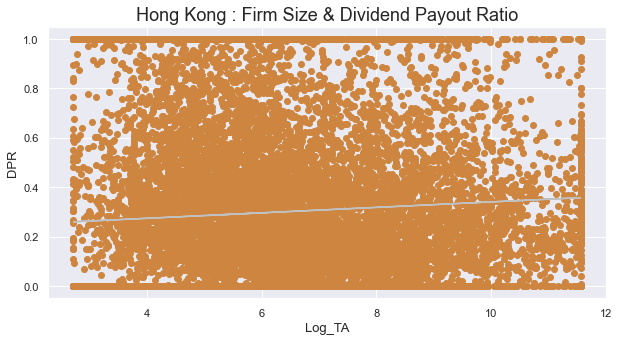

In [797]:
X = df_hk1["Log_TA"].values.reshape(-1, 1) 
Y = df_hk1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='peru')
plt.plot(X, Y_pred, color='silver')

plt.title('Hong Kong : Firm Size & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Log_TA', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

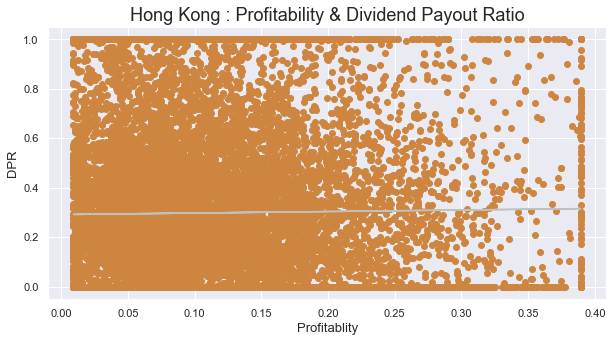

In [798]:
X = df_hk1["Profitability"].values.reshape(-1, 1) 
Y = df_hk1["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='peru')
plt.plot(X, Y_pred, color='silver')

plt.title('Hong Kong : Profitability & Dividend Payout Ratio', fontsize=18);
plt.xlabel('Profitablity', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

## Correlation analysis and heatmap of the correlation matrix : Japan

In [799]:
CorrMatrix_jap = df_jap1.corr()

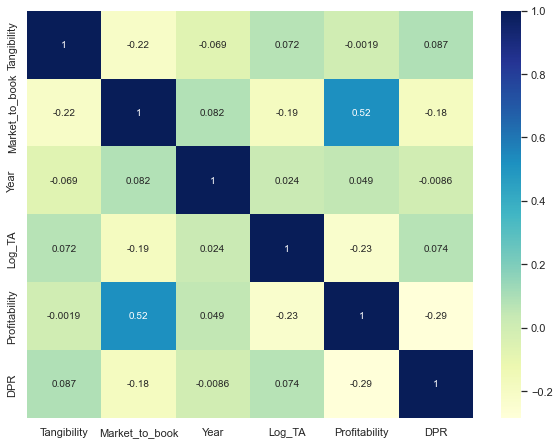

In [800]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix_jap,annot=True,cmap="YlGnBu")
plt.show()

## Correlation analysis and heatmap of the correlation matrix : Hong Kong

In [801]:
CorrMatrix_hk = df_hk1.corr()

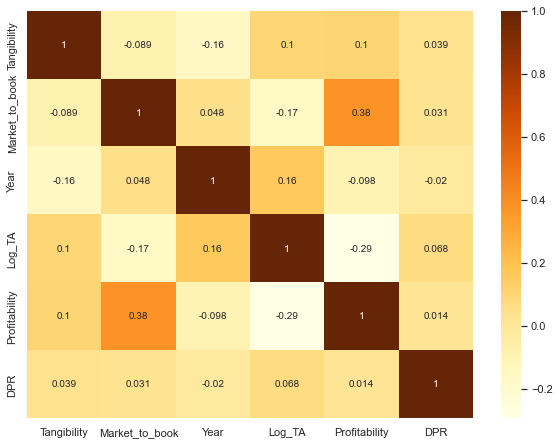

In [802]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix_hk,annot=True,cmap="YlOrBr")
plt.show()

## Kernel Density and Histogram Analysis

## Comparing the distribution of dividend payout ratio in 2012 and 2020 using distplot(): Japan

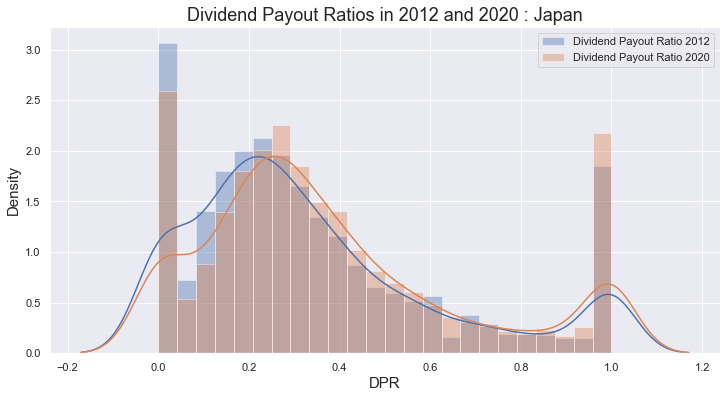

In [803]:
df_jap_2012 = df_jap1[df_jap1['Year'] == 2012]
df_jap_2020 = df_jap1[df_jap1['Year'] == 2020]

plt.figure(figsize=(12,6))
plt.xlabel('DPR', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Dividend Payout Ratios in 2012 and 2020 : Japan",fontsize=18)

sns.distplot(df_jap_2012["DPR"].values, label="Dividend Payout Ratio 2012");
sns.distplot(df_jap_2020["DPR"].values, label="Dividend Payout Ratio 2020");
plt.legend()
plt.show()

## Comparing the distribution of dividend payout ratio in 2012 and 2020 using distplot(): Hong Kong

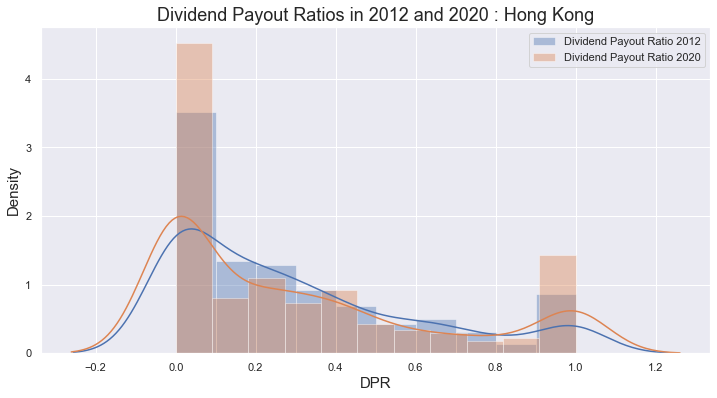

In [804]:
df_hk_2012 = df_hk1[df_hk1['Year'] == 2012]
df_hk_2020 = df_hk1[df_hk1['Year'] == 2020]

plt.figure(figsize=(12,6))
plt.xlabel('DPR', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Dividend Payout Ratios in 2012 and 2020 : Hong Kong",fontsize=18)

sns.distplot(df_hk_2012["DPR"].values, label="Dividend Payout Ratio 2012");
sns.distplot(df_hk_2020["DPR"].values, label="Dividend Payout Ratio 2020");
plt.legend()
plt.show()

## Regression Analysis

## Japan

In [805]:
import statsmodels.formula.api as sm

result_jap = sm.ols(formula="DPR ~ Tangibility + Market_to_book + Log_TA + Profitability", data=df_jap1).fit()
print(result_jap.params)

Intercept         0.425
Tangibility       0.112
Market_to_book   -0.007
Log_TA            0.000
Profitability    -1.325
dtype: float64


In [806]:
print(result_jap.summary())

                            OLS Regression Results                            
Dep. Variable:                    DPR   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1528.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:57:50   Log-Likelihood:                -5249.7
No. Observations:               61890   AIC:                         1.051e+04
Df Residuals:                   61885   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4249      0.005     86.

## Hong Kong

In [807]:
import statsmodels.formula.api as sm

result_hk = sm.ols(formula="DPR ~ Tangibility + Market_to_book + Log_TA + Profitability", data=df_hk1).fit()
print(result_hk.params)

Intercept        0.185
Tangibility      0.047
Market_to_book   0.012
Log_TA           0.012
Profitability    0.080
dtype: float64


In [808]:
print(result_hk.summary())

                            OLS Regression Results                            
Dep. Variable:                    DPR   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     29.80
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           9.93e-25
Time:                        20:57:53   Log-Likelihood:                -4198.4
No. Observations:               14909   AIC:                             8407.
Df Residuals:                   14904   BIC:                             8445.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1846      0.011     16.

## Machine Learning

## Linear Regression Model 1 

In [2]:
#data processing and creating dataframe specifically for model using 2021 data

In [52]:
mac = df.dropna(subset=['EBIT', 'MKT_EQUITY', 'BOOK_EQUITY','TA','SALES_USD','INTEREST', 'DIVIDEND', 'NET_INCOME'])


In [54]:
mac2 = mac[mac.EBIT > 0.0]


In [55]:
mac3 = mac2[mac2.NET_INCOME > 0.0]


In [56]:
mac3 =mac3.drop_duplicates()


In [57]:
mac3=mac3.rename(columns = {'year':'Year'})


In [58]:
mac3 = mac3[mac3.Year == 2021]


In [59]:
mac3.shape

(5449, 18)

In [60]:
# Setting the display format option to display three digits after the decimal point 

pd.set_option('display.float_format', '{:.2f}'.format)

In [61]:
mac3['Tangibility']=mac3['NPPE']/mac3['TA']
mac3['Market_to_book']= (mac3['TA'] + mac3['MKT_EQUITY'] - mac3['BOOK_EQUITY']) /mac3['TA']
mac3['Log_TA'] = np.log(mac3['TA_USD'])
mac3['Profitability']=mac3['EBITDA']/mac3['TA']
mac3['DPR']=mac3['DIVIDEND']/mac3['NET_INCOME']

In [31]:
pd.set_option('display.float_format', '{:.3f}'.format)



In [62]:
mac3.loc[mac3.DPR > 1.0, 'DPR'] = 1.0


In [63]:
mac3 = mac3.dropna()

In [65]:
# the aim of developing the model is to use the other measures to predict the DPR

In [66]:
# importing the linear regression model

from sklearn.linear_model import LinearRegression

In [67]:
# instantiating the linear regression class

model = LinearRegression(fit_intercept=True)

In [68]:
# assigning the target vector



df_y = pd.DataFrame(mac3["DPR"])

In [69]:
# assigning the feature matrix

df_X = pd.DataFrame(mac3[["Tangibility", "Market_to_book", "Log_TA", "Profitability"]])

In [70]:
# splitting the data set into different sections for training 70% and testing 30%

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state= None)

In [73]:
# fitting the training data to the linear regression model

model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Regression Results parameters

In [75]:
# the y intercept
model.intercept_

array([0.10424199])

In [76]:
# the four coefficients for the feature matrix measures
model.coef_

array([[ 0.12718796,  0.00848132,  0.03241638, -0.28481703]])

In [77]:
# Predicting the dividend payout ratios by utilising the training set and using the predict method

y_pred_train = model.predict(X_train)

In [78]:
y_pred_train

array([[0.27477678],
       [0.43286509],
       [0.37041843],
       ...,
       [0.32052809],
       [0.22134042],
       [0.25757856]])

In [79]:
# evaluating the model

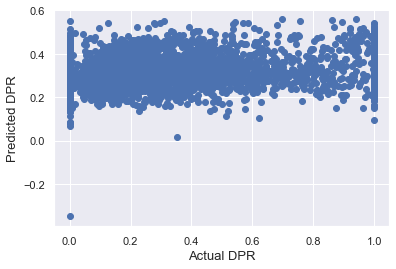

In [80]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual DPR', fontsize=13)
plt.ylabel('Predicted DPR', fontsize=13)
plt.show()

In [81]:
# utilising the R2 score to know how good the model is


In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_train, y_pred_train)

0.06510863068528416

In [84]:
#the r2 score illustrates how close the data has fitted to the regression line, 
#or the chances of how the DPR can be predicted using the other measures such as profitability and tangibility.
#only 5% of the variance in the dividend payout ratios can be explained by the other measures such as profitability and tangibility.
#the model is not acceptable for predicting DPRs.


In [85]:
#utilising the testing data to predict

In [86]:
y_pred_test = model.predict(X_test)

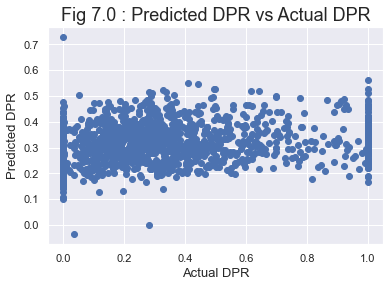

In [87]:
plt.scatter(y_test, y_pred_test)
plt.title('Fig 7.0 : Predicted DPR vs Actual DPR', fontsize=18);
plt.xlabel('Actual DPR', fontsize=13)
plt.ylabel('Predicted DPR', fontsize=13)
plt.savefig('predDPR', dpi=400, bbox_inches='tight')
plt.show()

In [88]:
r2_score(y_test, y_pred_test)

0.04709594299008357

In [89]:
# utilising the testing data set produces a marginally better result at 6%

## Model 2 KNN

In [1055]:
# creating a dataframe for ML analysis utilising only the year 2021

ml = df.dropna(subset=['EBIT', 'MKT_EQUITY', 'BOOK_EQUITY','TA','SALES_USD','INTEREST', 'DIVIDEND', 'NET_INCOME'])


In [1056]:
ml2=ml.drop_duplicates()
ml2.shape

(132760, 18)

In [1057]:
ml2=ml2.rename(columns = {'year':'Year'})



In [1058]:
# Setting the display format option to display three digits after the decimal point 

pd.set_option('display.float_format', '{:.2f}'.format)

In [1059]:
ml2['Tangibility']=ml2['NPPE']/ml2['TA']
ml2['Market_to_book']= (ml2['TA'] + ml2['MKT_EQUITY'] - ml2['BOOK_EQUITY']) /ml2['TA']
ml2['Log_TA'] = np.log(ml2['TA_USD'])
ml2['Profitability']=ml2['EBITDA']/ml2['TA']
ml2['DPR']=ml2['DIVIDEND']/ml2['NET_INCOME']

In [1060]:
pd.set_option('display.float_format', '{:.3f}'.format)


In [1061]:
ml2.loc[ml2.DPR > 0.0, 'DPR'] = 1.0


In [1062]:
ml2.loc[ml2.DPR < 0.0, 'DPR'] = 0.0


In [1063]:
ml2=ml2.dropna(subset=['Tangibility', 'Market_to_book', 'Log_TA','Profitability','DPR'])

In [1064]:
ml2=ml2.rename(columns = {'DPR':'PAYER'})


In [1065]:
ml3 = ml2[ml2.Year == 2021]


In [1066]:
ml3

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,Tangibility,Market_to_book,Log_TA,Profitability,PAYER
19,C036ABF00,2021,3029.240,723.482,1687.742,2116.158,39.657,487.592,2233.891,15.652,...,2199.895,0.000,-4.950,36,Australia,0.737,0.859,7.696,0.075,-0.000
35,C036AFQ10,2021,1010.121,448.833,1463.415,895.778,30.294,39.731,449.991,2.755,...,757.783,0.000,98.205,36,Australia,0.445,1.562,6.630,0.285,0.000
51,C036AIA00,2021,201.458,184.571,26.676,73.856,68.785,21.767,60.041,1.364,...,151.131,0.985,3.026,36,Australia,0.298,0.766,5.018,0.072,1.000
86,C036AJ830,2021,713.468,281.161,2001.305,667.063,7.067,21.215,28.285,5.932,...,535.237,24.221,88.130,36,Australia,0.040,2.870,6.283,0.200,1.000
92,C036AQ300,2021,33.590,17.138,40.301,2.845,2.032,4.290,6.226,0.473,...,25.199,0.000,-2.970,36,Australia,0.185,2.115,3.227,0.019,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147726,C82698A00,2021,31.140,65.731,26.870,21.262,0.778,1.023,2.259,0.110,...,41.968,0.391,1.114,826,UK,0.073,1.180,3.737,0.103,1.000
147795,C82698240,2021,7294.817,2974.561,2982.363,1875.730,0.000,586.175,66.806,36.964,...,9871.200,28.523,137.888,826,UK,0.009,1.152,9.197,0.030,1.000
147831,C82698270,2021,3843.249,3192.208,2632.106,2390.581,14.215,183.096,35.811,18.931,...,5200.608,88.709,254.125,826,UK,0.009,1.063,8.557,0.097,1.000
147929,C82699330,2021,249.509,146.957,730.320,212.677,1.153,8.707,27.441,0.651,...,337.631,3.845,17.481,826,UK,0.110,3.075,5.822,0.126,1.000


In [1067]:
#importing necessary libraries
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [1068]:
#assigning features matrix and target vector

ml_y = pd.DataFrame(ml3["PAYER"])
ml_y.shape

(6966, 1)

In [1069]:
ml_y

,PAYER
19,-0.000
35,0.000
51,1.000
86,1.000
92,-0.000
...,...
147726,1.000
147795,1.000
147831,1.000
147929,1.000


In [1070]:
ml_X = pd.DataFrame(ml3[["Tangibility", "Market_to_book", "Log_TA", "Profitability"]])
ml_X.shape


(6966, 4)

In [1071]:
Xtrain2, Xtest2, y2_train, y2_test = train_test_split(ml_X, ml_y, random_state = 1, train_size = 0.8)

In [1072]:
scaler = preprocessing.StandardScaler().fit(Xtrain2)


In [1073]:
# training the model

In [1074]:
Xtrain2 = scaler.transform(Xtrain2)


In [1075]:
Xtest2 = scaler.transform(Xtest2)

In [1076]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [1077]:
# fitting the model

In [1078]:
classifier.fit(Xtrain2, y2_train)

KNeighborsClassifier()

In [1079]:
#making predictions on the test data

In [1080]:
y_pred2 = classifier.predict(Xtest2)

In [1083]:
# evaluating the model using confusion matrix, precision, recall and f1 score

In [1084]:
print(classification_report(y2_test, y_pred2))
print(confusion_matrix(y2_test, y_pred2))

              precision    recall  f1-score   support

        -0.0       0.77      0.65      0.70       564
         1.0       0.78      0.87      0.82       830

    accuracy                           0.78      1394
   macro avg       0.78      0.76      0.76      1394
weighted avg       0.78      0.78      0.77      1394

[[365 199]
 [111 719]]
